CLASSIFICATION OF HANDWRITTEN DIGITS

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

MNIST is a commonly used handwritten digit dataset(0-9) consisting of 60,000 images in the training set and 10,000 images in the test set. So, each digit has 6000 images in the training set. The digits are size-normalized and centered in a fixed-size ( 28×28 ) image. The task is to train a machine learning algorithm to recognize a new sample from the test set correctly.

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
#train_images,train_labels,test_images,test_labels
(X_train, y_train),(X_test,y_test) = mnist.load_data('D:/git/DeepLearning/CNN/dataset/mnist.npz')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train[0]

5

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

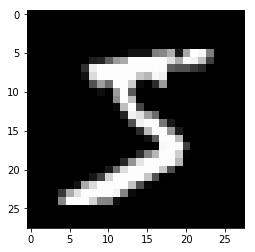

In [8]:
plt.imshow(X_train[0],cmap='gray')

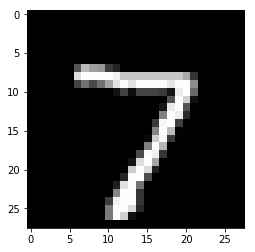

In [9]:
plt.imshow(X_test[0],cmap='gray')

We will use raw pixel values as input to the network. The images are matrices of size 28×28. So, we reshape the image matrix to an array of size 784 ( 28*28 ) and feed this array to the network as a single feature.

In [10]:
#reshape to get 2d object array
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [11]:
X_train.shape

(60000, 784)

Convert the data to float and scale the values between 0 to 1.

In [12]:
#converting values 0 to 255 to b/e 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [13]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
# Find the unique numbers from the train labels - 10 classes
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


when using the categorical_crossentropy loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample). In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical1

from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(int_labels, num_classes=None)


In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. 
One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.
For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [17]:
y_train[0]

5

In [18]:
# value 1 for the digit 5. others are 0
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [19]:
#10 categories from digit 0-9
y_train_cat.shape

(60000, 10)

In [20]:
y_test_cat.shape

(10000, 10)

Fully connected model to classify images

Final architecture: cnn
![title](img/cnn.jpg)

1) Activation functions:
    
- Sigmoid
It maps the input ( x axis ) to values between 0 and 1.
sigmoid

- Tanh
It is similar to the sigmoid function butmaps the input to values between -1 and 1.
tanh function

- Rectified Linear Unit (ReLU)
It allows only positive values to pass through it. The negative values are mapped to zero.

2) Input layer:
first layer of a neural network, used to provide the input data or features to the network.

3) Hidden layer:
the number of hidden layers = the depth of the neural network. 

4) Output layer:

The activation function to be used in this layer is different for different problems. 
- For a binary classification problem, we want the output to be either 0 or 1. Thus, a sigmoid activation function is used.
- For a Multiclass classification problem, a Softmax ( think of it as a generalization of sigmoid to multiple classes ) is used. 
- For a regression problem, where the output is not a predefined category, we can simply use a linear unit.

![title](img/keras-workflow.jpg)

we configure the optimizer to be rmsprop. We also specify the loss type which is categorical cross entropy which is used for multiclass classification. We also specify the metrics ( accuracy in this case ) which we want to track during the training process. 

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()
model = Sequential()
#input layer
model.add(Dense(512,input_dim =28*28,activation='relu'))
#hidden layers
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

The network is ready to get trained. This is done using the fit() function in Keras. We specify the number of epochs as 20. This means that the whole dataset will be fed to the network 10 times. We will be using the test data for validation.

In [22]:
h = model.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 406us/step - loss: 0.3314 - acc: 0.8968 - val_loss: 0.1593 - val_acc: 0.9508
Epoch 2/10
42000/42000 [==============================] - 12s 287us/step - loss: 0.1116 - acc: 0.9659 - val_loss: 0.1187 - val_acc: 0.9644
Epoch 3/10
42000/42000 [==============================] - 13s 306us/step - loss: 0.0727 - acc: 0.9779 - val_loss: 0.1413 - val_acc: 0.9592
Epoch 4/10
42000/42000 [==============================] - 14s 336us/step - loss: 0.0521 - acc: 0.9835 - val_loss: 0.1016 - val_acc: 0.9728
Epoch 5/10
42000/42000 [==============================] - 13s 309us/step - loss: 0.0384 - acc: 0.9885 - val_loss: 0.1630 - val_acc: 0.9614
Epoch 6/10
42000/42000 [==============================] - 14s 329us/step - loss: 0.0308 - acc: 0.9902 - val_loss: 0.1668 - val_acc: 0.9616
Epoch 7/10
42000/42000 [==============================] - 10s 245us/step - loss: 0.0248 - acc: 0.9922 - val_loss: 0.

In [23]:
h.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5,1,'Loss Curves')

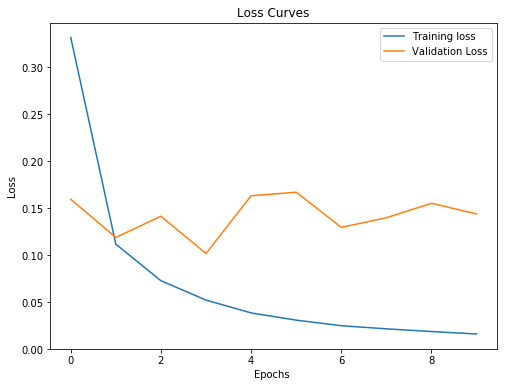

In [24]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')

validation loss initially decrease, but then it starts increasing gradually. Also, there is a substantial difference between the training and test accuracy. This is a clear sign of Overfitting which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data.

Text(0,0.5,'Accuracy')

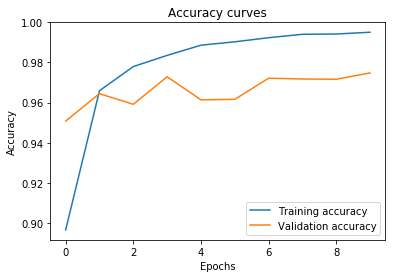

In [25]:
#accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#overfitting since train accuracy > validation accuracy

We check the performance on the whole test data using the evaluate() method.

In [26]:
[test_loss,test_accuracy] = model.evaluate(X_test,y_test_cat)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_accuracy))

10000/10000 [==============================] - ETA:  - 4s 366us/step
Evaluation result on Test Data : Loss = 0.10923587586516532, accuracy = 0.9809


 Add REGULARIZATION to the model

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.backend as K

K.clear_session()
model_reg = Sequential()
#input layer
model_reg.add(Dense(512,input_dim =28*28,activation='relu'))
#dropout layer
model_reg.add(Dropout(0.5))
#hidden layers
model_reg.add(Dense(256,activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(128,activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(32,activation='relu'))
model_reg.add(Dropout(0.5))
#output layer
model_reg.add(Dense(10,activation='softmax'))
model_reg.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
h = model_reg.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 19s 442us/step - loss: 1.1246 - acc: 0.6207 - val_loss: 0.2866 - val_acc: 0.9256
Epoch 2/10
42000/42000 [==============================] - 14s 325us/step - loss: 0.4735 - acc: 0.8774 - val_loss: 0.2137 - val_acc: 0.9482
Epoch 3/10
42000/42000 [==============================] - 13s 315us/step - loss: 0.3640 - acc: 0.9130 - val_loss: 0.2022 - val_acc: 0.9558
Epoch 4/10
42000/42000 [==============================] - 13s 303us/step - loss: 0.3043 - acc: 0.9287 - val_loss: 0.1921 - val_acc: 0.9612
Epoch 5/10
42000/42000 [==============================] - 13s 318us/step - loss: 0.2773 - acc: 0.9371 - val_loss: 0.1854 - val_acc: 0.9642
Epoch 6/10
42000/42000 [==============================] - 15s 359us/step - loss: 0.2619 - acc: 0.9410 - val_loss: 0.1657 - val_acc: 0.9681
Epoch 7/10
42000/42000 [==============================] - 13s 304us/step - loss: 0.2516 - acc: 0.9437 - val_loss: 0.

Text(0.5,1,'Loss Curves')

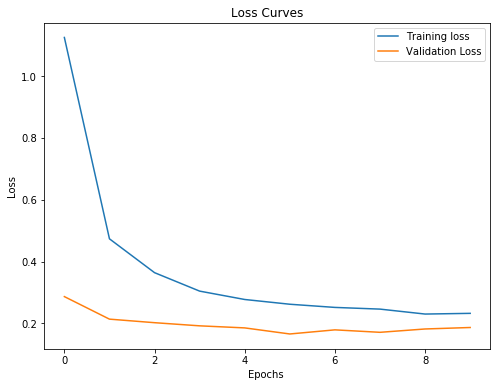

In [29]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')

    - The validation loss is not increasing
    - The difference between the train and validation accuracy is not very high

Thus, we can say that the model has better generalization capability

Text(0,0.5,'Accuracy')

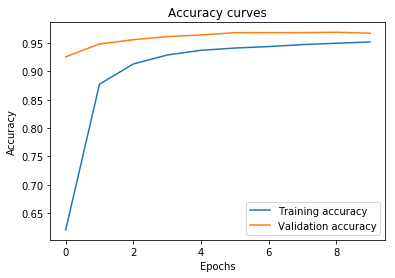

In [30]:
#accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [31]:
[test_loss,test_accuracy] = model_reg.evaluate(X_test,y_test_cat)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_accuracy))

10000/10000 [==============================] - 3s 327us/step
Evaluation result on Test Data : Loss = 0.16012099487827364, accuracy = 0.971


Inference on a single image
the first image in the test set is the number 5. Let us see what the model predicts.

In [32]:
# Predict the most likely class
model_reg.predict_classes(X_test[[0],:])

array([7], dtype=int64)

In [33]:
y_test[0]

7

Getting the probabilities:
we may want the probabilities of the different classes which indicates how confident the model is about the occurence of a particular class. 

In [34]:
# Predict the probabilities for each class 
model_reg.predict(X_test[[0],:])

array([[  2.30739836e-30,   5.81236103e-30,   6.71963367e-14,
          5.18339234e-12,   6.22372695e-23,   1.60515173e-20,
          1.34252693e-34,   1.00000000e+00,   3.20775596e-18,
          7.82258806e-13]], dtype=float32)

This gives the probability score for each class. We can see that the score for the 8th index is almost 1 which indicates that the predicted class is 7 with a confidence score of 1.

In [35]:
X_test.shape

(10000, 784)

In [36]:
X_train.shape

(60000, 784)

In [37]:
#reshape 4 order tensor
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [38]:
X_train.shape

(60000, 28, 28, 1)

In [39]:
from keras.layers import Flatten, Activation

In [40]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=6, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/6
42000/42000 [==============================] - 54s 1ms/step - loss: 0.2616 - acc: 0.9212 - val_loss: 0.1204 - val_acc: 0.9637
Epoch 2/6
42000/42000 [==============================] - 49s 1ms/step - loss: 0.0778 - acc: 0.9770 - val_loss: 0.0861 - val_acc: 0.9742
Epoch 3/6
42000/42000 [==============================] - 42s 1ms/step - loss: 0.0503 - acc: 0.9856 - val_loss: 0.0709 - val_acc: 0.9778
Epoch 4/6
42000/42000 [==============================] - 41s 965us/step - loss: 0.0365 - acc: 0.9886 - val_loss: 0.0586 - val_acc: 0.9822
Epoch 5/6
42000/42000 [==============================] - 40s 963us/step - loss: 0.0256 - acc: 0.9921 - val_loss: 0.0657 - val_acc: 0.9818
Epoch 6/6
42000/42000 [==============================] - 41s 977us/step - loss: 0.0194 - acc: 0.9945 - val_loss: 0.0567 - val_acc: 0.9833


In [43]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 3s 302us/step


[0.045489350459445271, 0.98529999999999995]